In [8]:
# data manipulation
import pandas as pd
import numpy as np
from readFiles import fullRead

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

from sklearn import preprocessing

def fullRead(pathToTable, sep, anthro = False):

  df_renamed = pd.read_csv(pathToTable, sep = sep, encoding = "latin_1")


  # reading and merging    
  
  if anthro == True:
    df_anthro = pd.read_csv("data/chronicAnthropometricCardiovascularData.csv", sep=";", decimal=",")
    df_renamed = df_renamed.merge(df_anthro)

    # separating by time moment and renaming

    df_renamed["Weight"] = ""
    df_renamed["BMI"] = ""
    df_renamed["Fat"] = ""
    df_renamed["CVRI"] = ""
    df_renamed["Bpmin"] = ""
    df_renamed["Bpmax"] = ""
    df_renamed["Frec"] = ""

    for i in range(len(df_renamed)):

        if df_renamed.loc[i]["Time"] == "Initial":
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso inicial"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Inicial"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa inicial"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV inicial"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin inicial"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax inicial"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec inicial"] 
                
        if df_renamed.loc[i]["Time"] == "Final":
        
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso final"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Final"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa final"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV Final"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin final"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax final"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec final"] 
        
    df_renamed.drop(columns = ["Peso inicial", "Peso final", "Delta Peso", "Talla", "IMC Inicial", "IMC Final", "Delta IMC", "Grasa inicial", "Grasa final", "Delta Grasa", "IRCV Final", "IRCV inicial", "Bpmin final", "Bpmin inicial", "Bpmax final", "Bpmax inicial", "Frec final", "Frec inicial",], inplace=True )
  
  df_renamed.drop(columns = ["Unnamed: 0", "grouping"], inplace=True )
  df_renamed.fillna(0, inplace=True)
  return df_renamed

def scaling(df_read):
   
   scaler = preprocessing.MinMaxScaler()
   numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
   df_read[numCols] = scaler.fit_transform(df_read[numCols])
   return df_read

df1_anthro = scaling(fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= True))
df1_metab = scaling(fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= False))

C:\Users\Cristina García\AppData\Local\Temp\ipykernel_26224\1951205993.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
C:\Users\Cristina García\AppData\Local\Temp\ipykernel_26224\1951205993.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns


In [2]:
df1.shape

(250, 25)

In [3]:
pd.value_counts(df1.dtypes)

float64    21
object      3
int64       1
dtype: int64

In [4]:
df1.describe(exclude="number")

,Sweetener,Time,Sex
count,250,250,250
unique,3,2,2
top,SU,Initial,MAN
freq,84,125,142


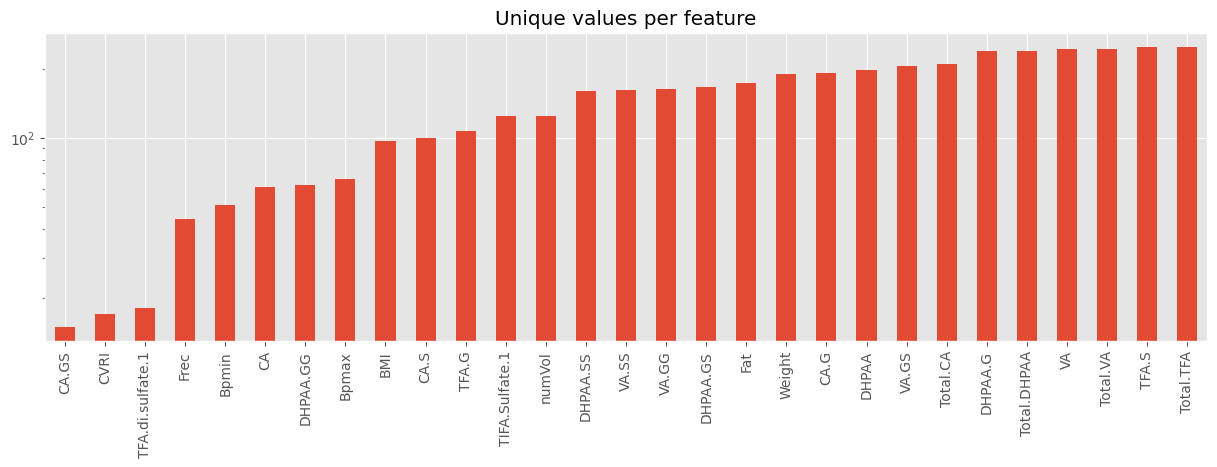

In [5]:
# For each numerical feature compute number of unique entries
unique_values = df1.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

2. Quality investigation

In [4]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df1.drop(labels=["numVol"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


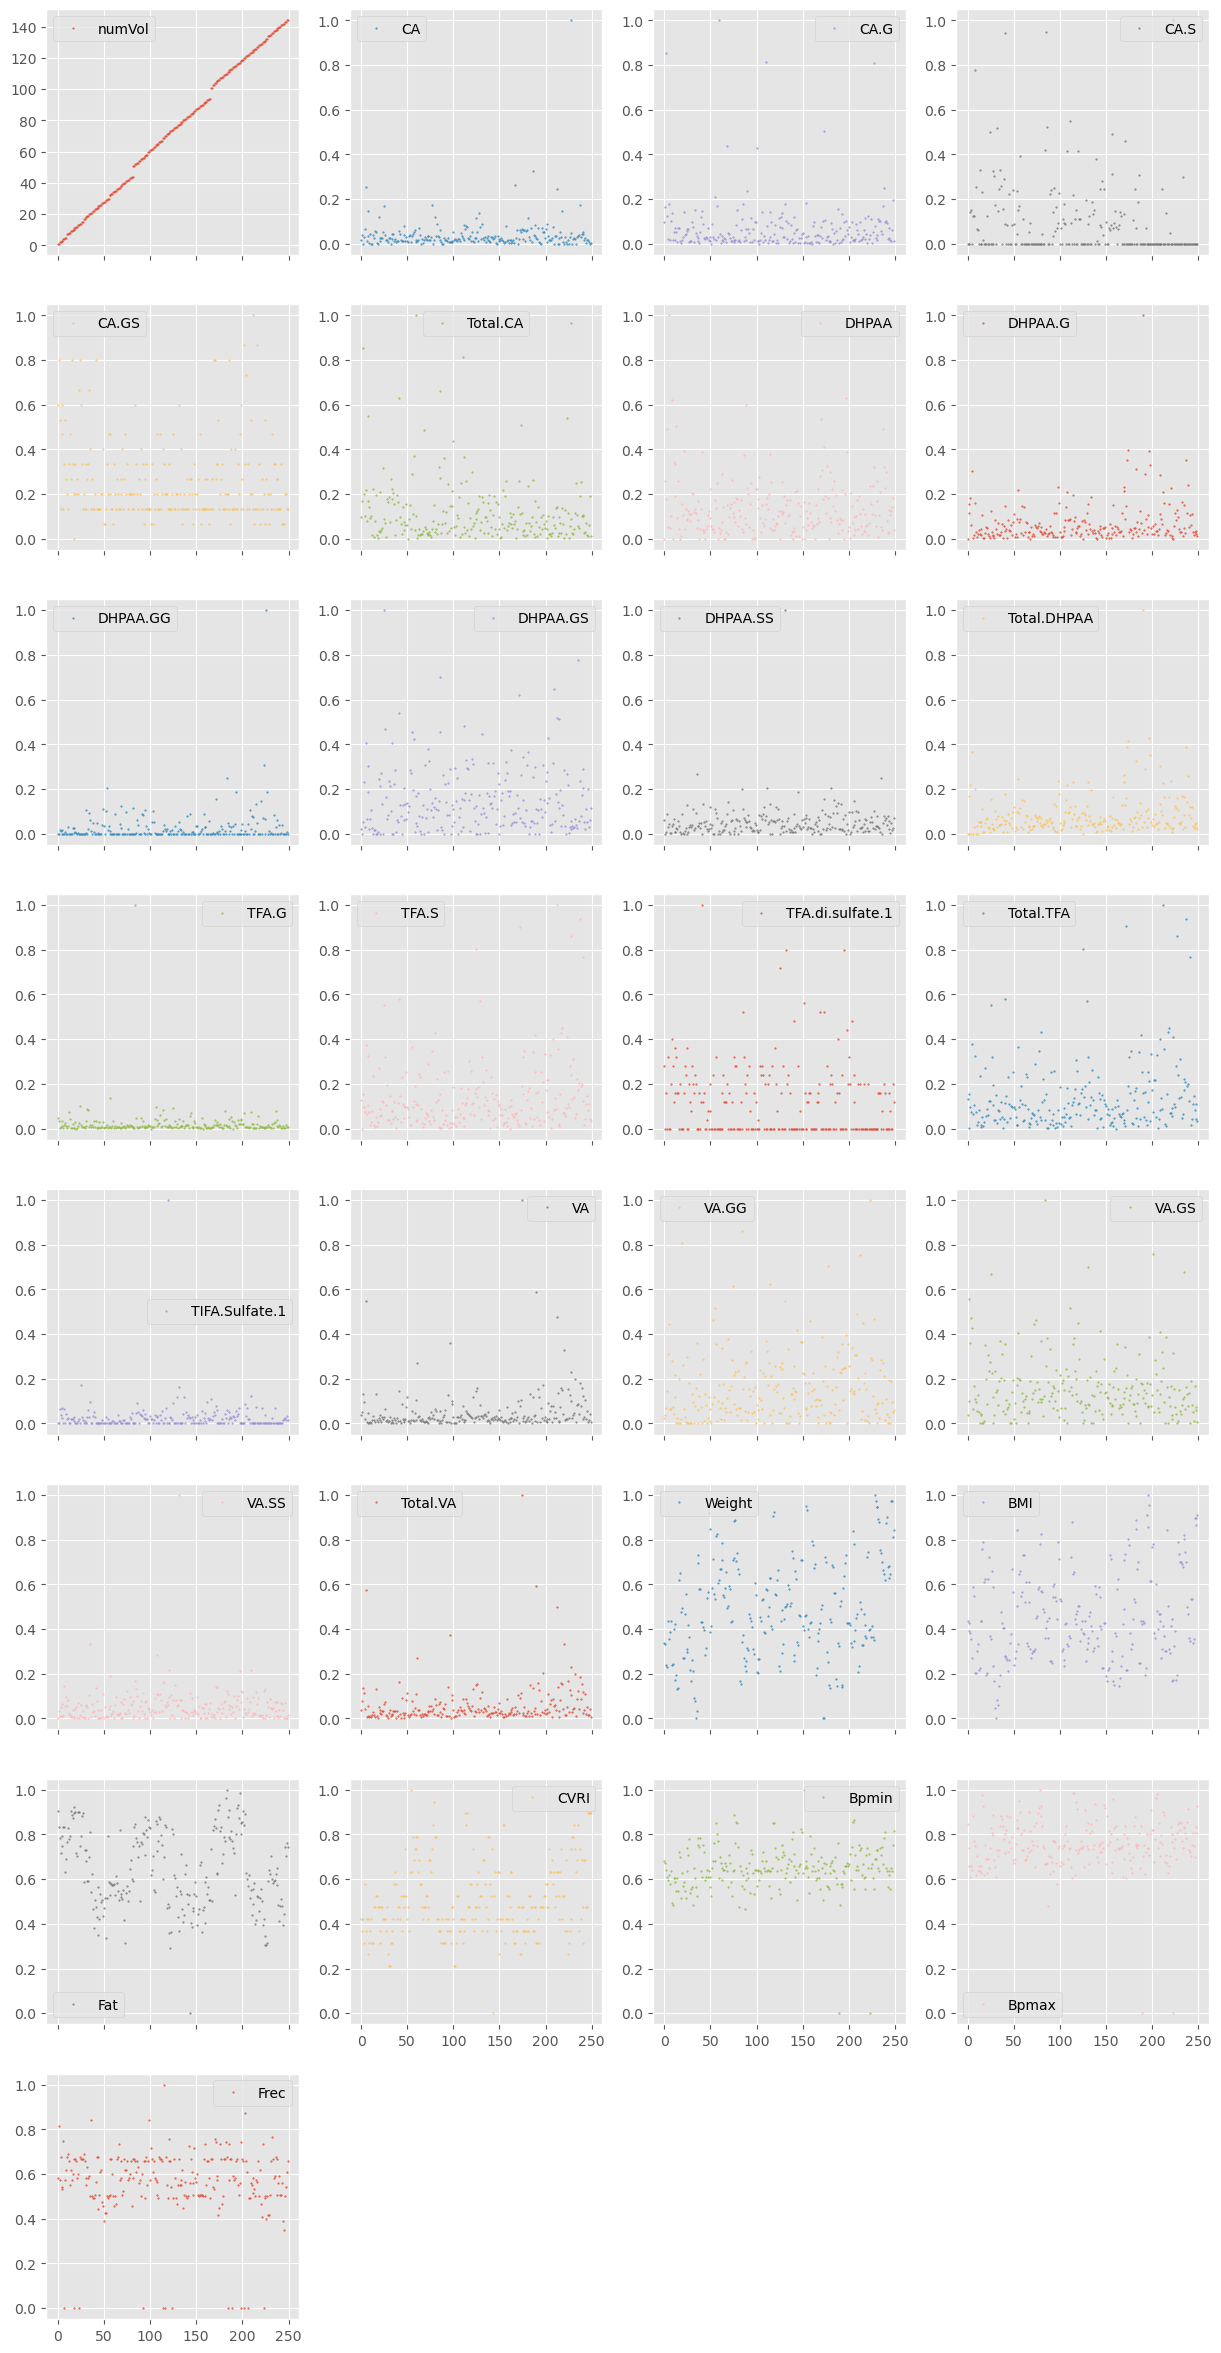

In [6]:
df1.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [ ]:
# more quality

3.1. Feature distribution

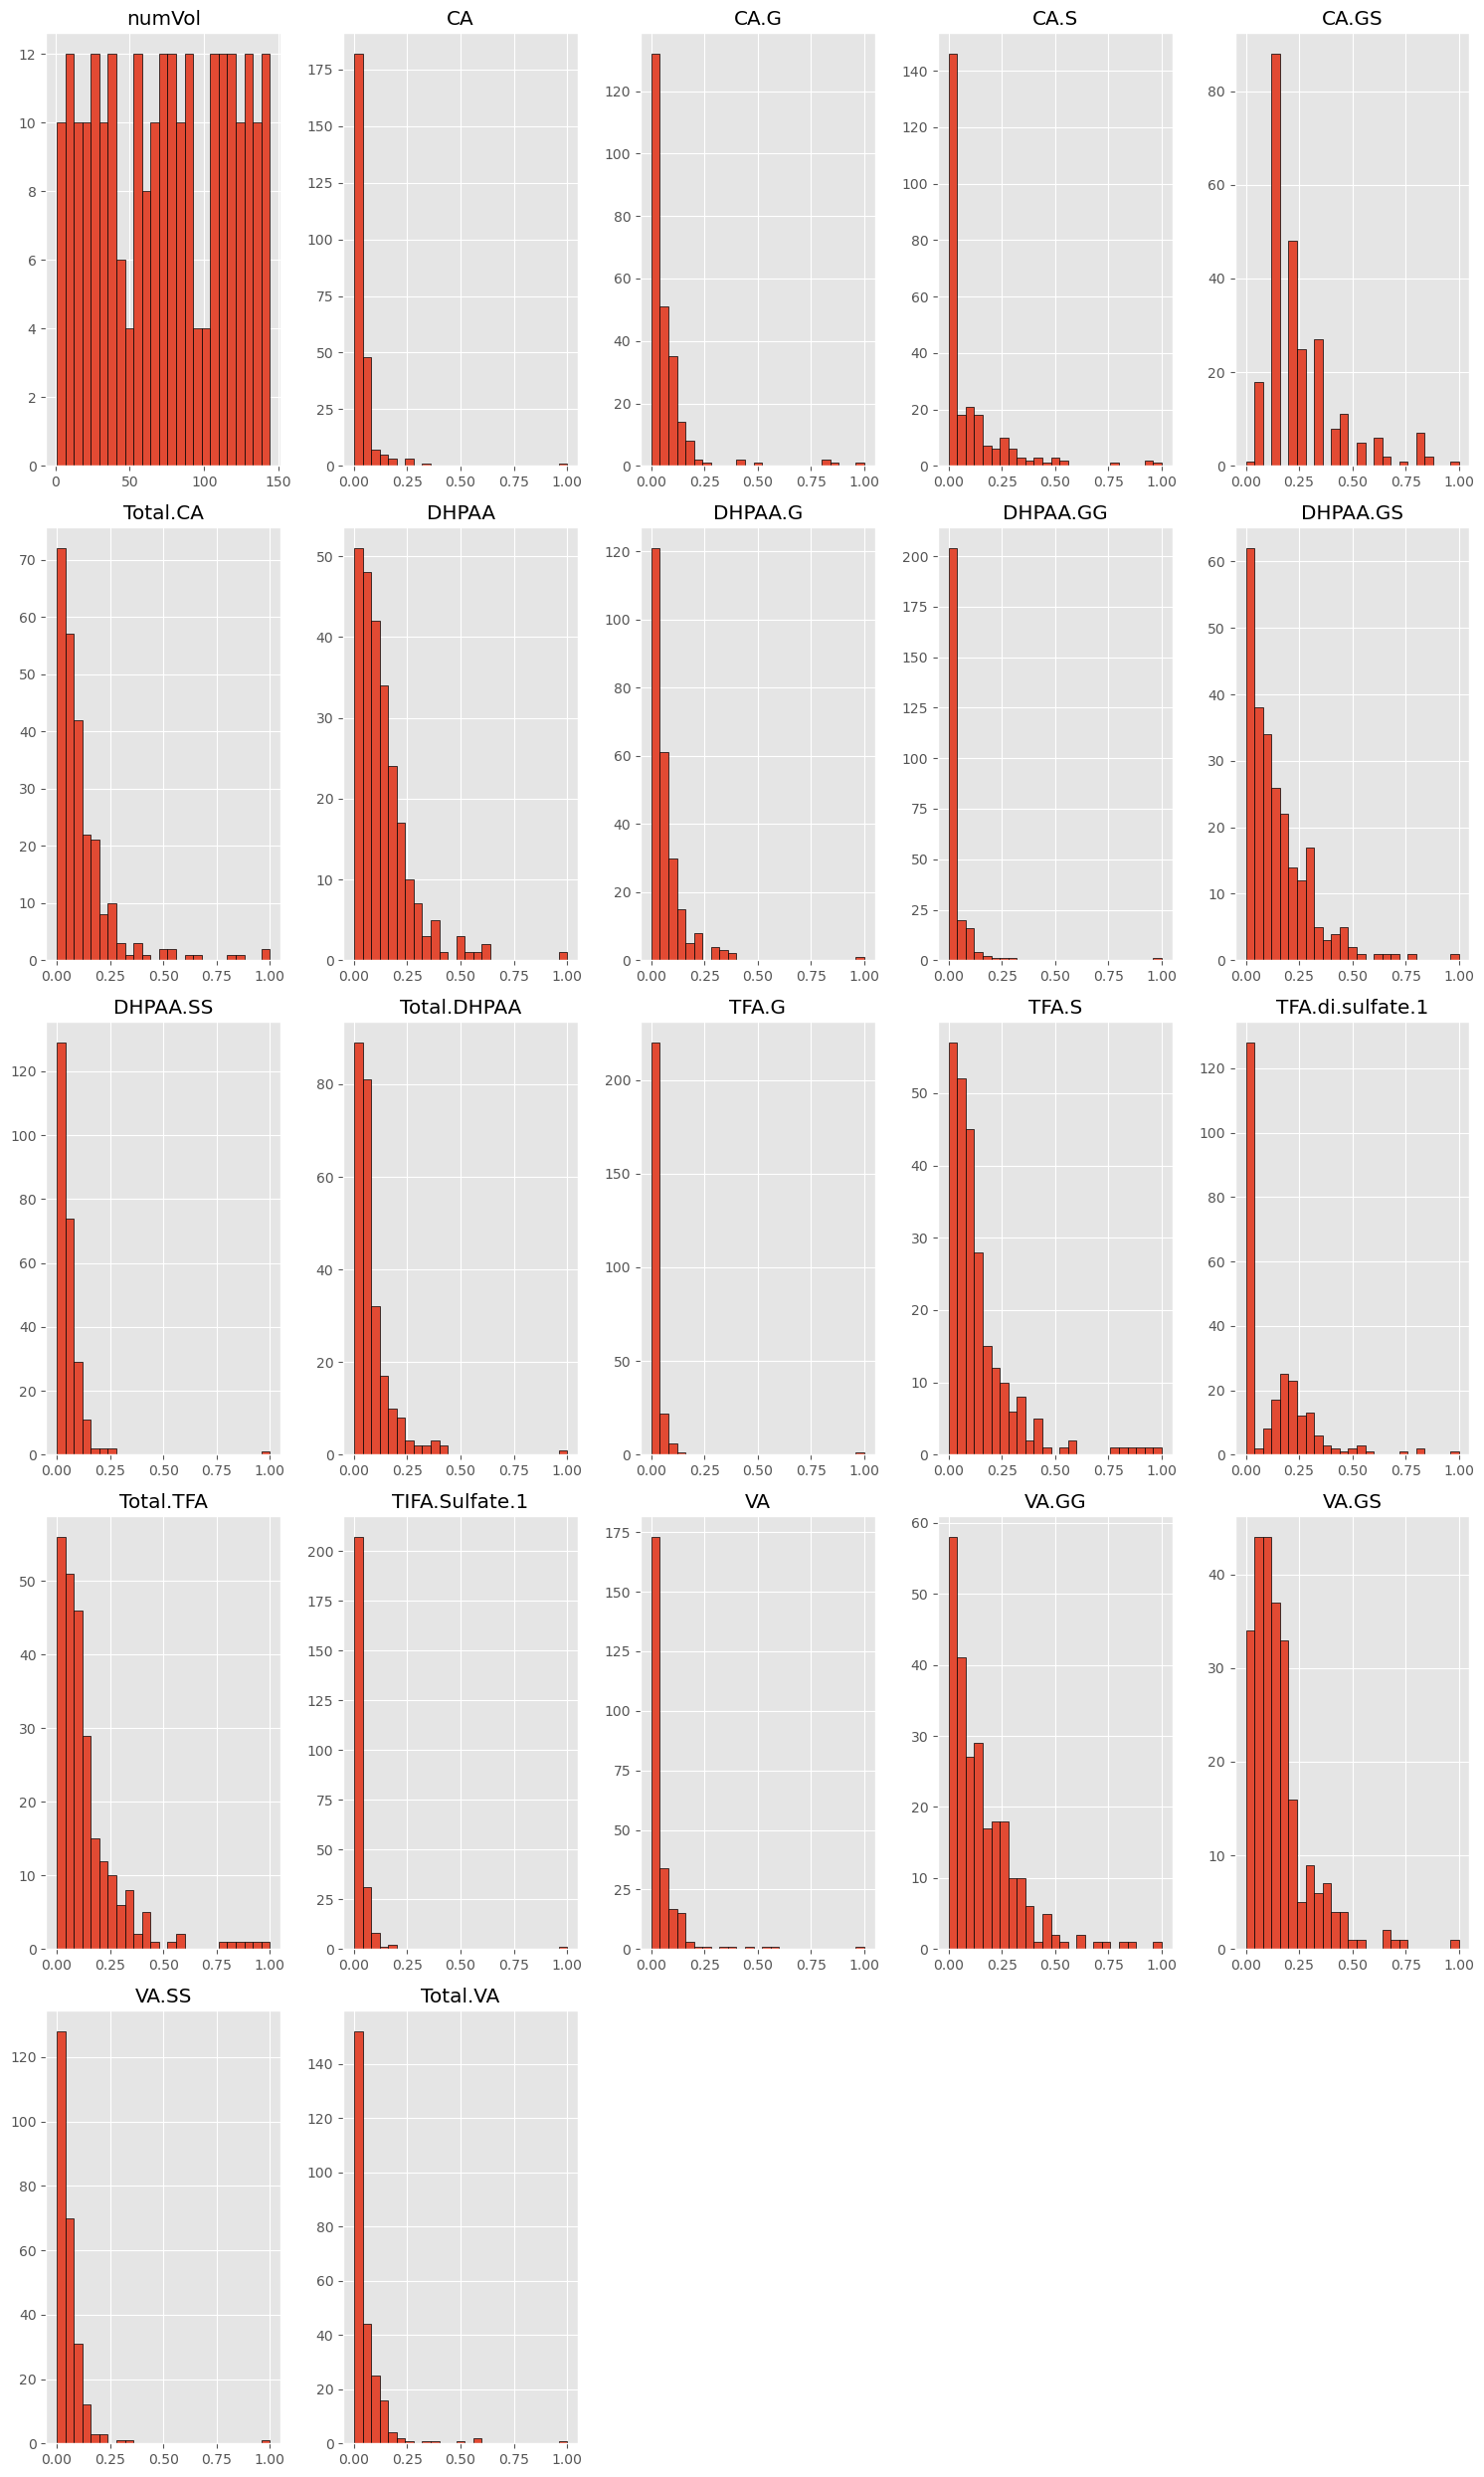

In [9]:
# Plots the histogram for each numerical feature in a separate subplot
df1_metab.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Bla bla bla 

3.3 Correlations

In [13]:
df_corr = df1_anthro.corr(method="pearson")


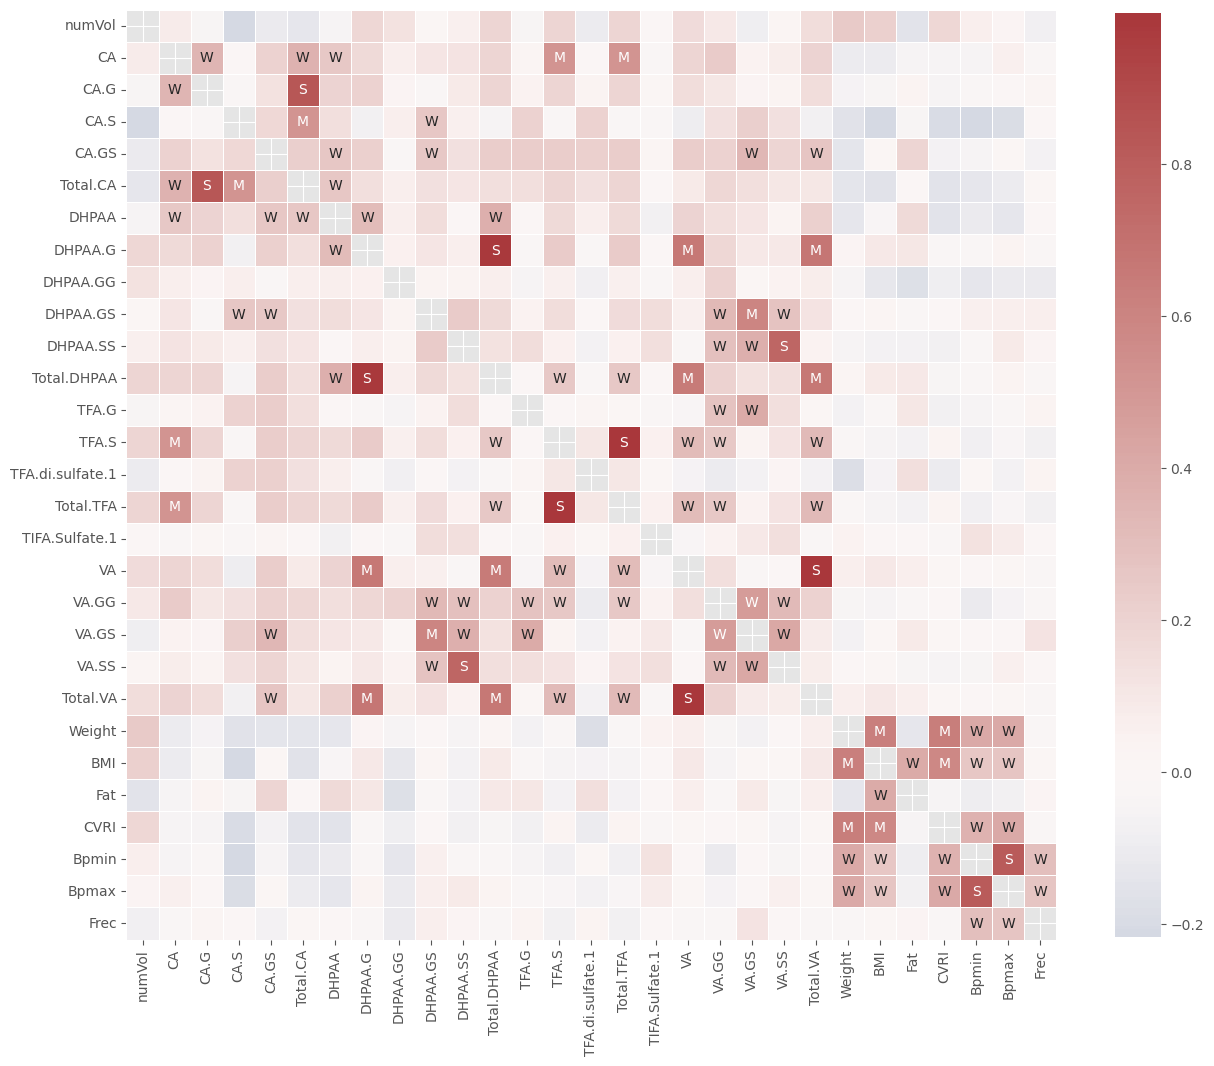

In [14]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [22]:
pd.set_option('display.max_rows', None)

#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
print(df_corr_stacked)

Bpmin             CA.S               -0.216050
BMI               CA.S               -0.209916
CA.S              numVol             -0.206785
CVRI              CA.S               -0.196840
Bpmax             CA.S               -0.191286
Weight            TFA.di.sulfate.1   -0.187065
Fat               DHPAA.GG           -0.170599
Weight            CA.S               -0.159235
BMI               Total.CA           -0.154546
CVRI              Total.CA           -0.154154
Fat               numVol             -0.149612
CVRI              DHPAA              -0.145727
Weight            Total.CA           -0.143202
                  CA.GS              -0.142029
Total.CA          numVol             -0.138659
Bpmin             DHPAA.GG           -0.138426
Fat               Weight             -0.137848
Bpmax             DHPAA              -0.136872
Bpmin             Total.CA           -0.133382
Weight            DHPAA              -0.130553
BMI               DHPAA.GG           -0.122579
Bpmin        